In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../..")
from utils.StockPricesProcess import load_prices_df, add_lags

# defining the path to the stock prices data and the date range
df_path = "../../data/stock_prices/yfinance/AAPL_prices.csv"
start_date_string = "2022-01-01"
end_date_string = "2022-09-30"

# Load stock prices and add lags using functions from StockPricesProcess.py
stock_data = load_prices_df(path=df_path, start_date_string=start_date_string, end_date_string=end_date_string)
stock_data = add_lags(stock_data=stock_data.copy(), numLags=3)
stock_data.head()


,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3
Date,,,,,,,,
2022-01-03 05:00:00+00:00,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564
2022-01-04 05:00:00+00:00,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564
2022-01-05 05:00:00+00:00,177.354699,177.907665,172.447104,172.723587,94537600,177.443573,179.724564,179.724564
2022-01-06 05:00:00+00:00,170.531448,173.098806,169.484760,169.840240,96904000,172.723587,177.443573,179.724564
2022-01-07 05:00:00+00:00,170.719093,171.953398,168.882448,170.008133,86709100,169.840240,172.723587,177.443573


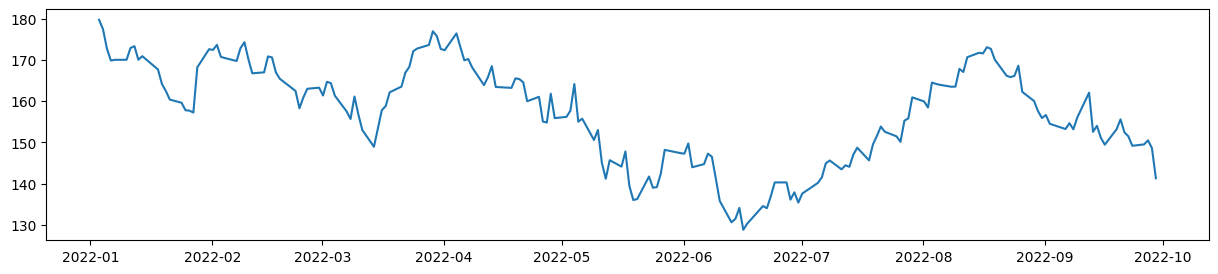

In [2]:
plt.figure(figsize=(15, 3))
plt.plot(stock_data.index, stock_data['Close'],)

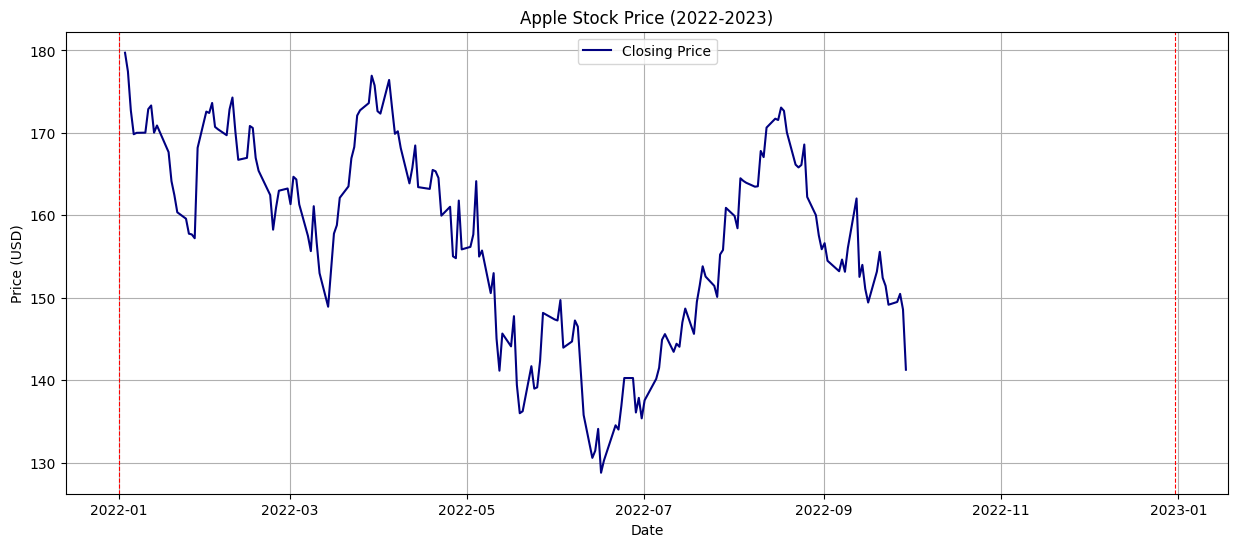

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(15, 6))
plt.plot(stock_data.index, stock_data['Close'], color='navy', label='Closing Price')
# Adding labels and title
plt.title('Apple Stock Price (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
# Adding grid for better readability
plt.grid(True)
# Adding legend
plt.legend()
# Adding vertical lines to mark the beginning and end of 2022 and 2023
plt.axvline(x=datetime(2022, 1, 1), color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=datetime(2022, 12, 31), color='red', linestyle='--', linewidth=0.8)
plt.show()


In [4]:

tweets = pd.read_csv("../../data/social_media_tweets/stock_tweets.csv")
tweets = tweets[tweets["Stock Name"] == "AAPL"] 
tweets["Date"] = pd.to_datetime(tweets["Date"])

start_date = pd.to_datetime(start_date_string, utc=True)
end_date = pd.to_datetime(end_date_string, utc=True)

tweets = tweets.loc[(tweets["Date"] >= start_date) & (tweets["Date"] <= end_date)]

tweets['Date'] = pd.to_datetime(tweets['Date'], utc=True).dt.date



In [5]:
import sys
sys.path.append('../..')
from utils.SentimentAnalysis import preprocess_text

tweets["processed_tweet"] = tweets["Tweet"].apply(preprocess_text)


c:\Users\omare\.conda\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
from utils.SentimentAnalysis import get_vader_sentiment_score 

tweets["sentiment_score"] = tweets["processed_tweet"].apply(get_vader_sentiment_score)
tweets_aggregated_score = tweets.groupby("Date")["sentiment_score"].mean().reset_index()



In [9]:
tweets_aggregated_score.head()


,Date,sentiment_score
0,2022-01-01,0.415550
1,2022-01-02,0.134000
2,2022-01-03,0.211930
3,2022-01-04,0.183754
4,2022-01-05,-0.027900


In [10]:
stock_data.head()

,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3
Date,,,,,,,,
2022-01-03 05:00:00+00:00,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564
2022-01-04 05:00:00+00:00,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564
2022-01-05 05:00:00+00:00,177.354699,177.907665,172.447104,172.723587,94537600,177.443573,179.724564,179.724564
2022-01-06 05:00:00+00:00,170.531448,173.098806,169.484760,169.840240,96904000,172.723587,177.443573,179.724564
2022-01-07 05:00:00+00:00,170.719093,171.953398,168.882448,170.008133,86709100,169.840240,172.723587,177.443573


In [11]:
stock_data['Date'] = stock_data.index
stock_data['Date'] = pd.to_datetime(stock_data['Date'], utc=True).dt.date
stock_data.reset_index(drop=True, inplace=True)
tweets_aggregated_score['Date'] = pd.to_datetime(tweets_aggregated_score['Date'], utc=True).dt.date

merged_data = pd.merge(stock_data, tweets_aggregated_score, on="Date", how="left")
merged_data.set_index("Date", inplace=True)

nan_values = merged_data.isna().sum()

merged_data.head()

,Open,High,Low,Close,Volume,Close_Lag1,Close_Lag2,Close_Lag3,sentiment_score
Date,,,,,,,,,
2022-01-03,175.597058,180.583650,175.478569,179.724564,104487900,179.724564,179.724564,179.724564,0.211930
2022-01-04,180.336790,180.642895,176.870854,177.443573,99310400,179.724564,179.724564,179.724564,0.183754
2022-01-05,177.354699,177.907665,172.447104,172.723587,94537600,177.443573,179.724564,179.724564,-0.027900
2022-01-06,170.531448,173.098806,169.484760,169.840240,96904000,172.723587,177.443573,179.724564,0.110987
2022-01-07,170.719093,171.953398,168.882448,170.008133,86709100,169.840240,172.723587,177.443573,0.176183


In [1]:
from scipy.stats import pearsonr, t
import numpy as np

time_lags = [-9, -7, -5, -3, -1, 0, 1, 3, 5, 7, 9]

# Lists to store results
coefficients = []
standard_errors = []
p_values = []
t_scores = []

for lag in time_lags:
    lag_column_name = f'Sentiment_Lag_{lag}'
    merged_data[lag_column_name] = merged_data['sentiment_score'].shift(lag)
    correlation_data = merged_data[[lag_column_name]].join(merged_data['Close']).dropna()
    
    # Calculate Pearson correlation coefficient, p-value, and t-score
    correlation, p_value = pearsonr(correlation_data[lag_column_name], correlation_data['Close'])
    n = correlation_data.shape[0] 
    se = np.sqrt((1 - correlation**2) / (n - 2))
    t_score = correlation / se  # Calculate t-score
    
    coefficients.append(round(correlation, 4))
    standard_errors.append(round(se, 4))
    p_values.append(round(p_value, 4))
    t_scores.append(round(t_score, 4))

# Print results
print("Pearson Coefficients, Standard Errors, P-values, and t-scores for Sentiment Sources and AAPL Stock Price Changes:")
print("Sentiment Source\tTime Lag\tCoef.\tSE\tP-val\tt-score")
for i, lag in enumerate(time_lags):
    print(f"Twitter\t\t{lag}\t\t{coefficients[i]}\t{standard_errors[i]}\t{p_values[i]}\t{t_scores[i]}")


NameError: name 'merged_data' is not defined

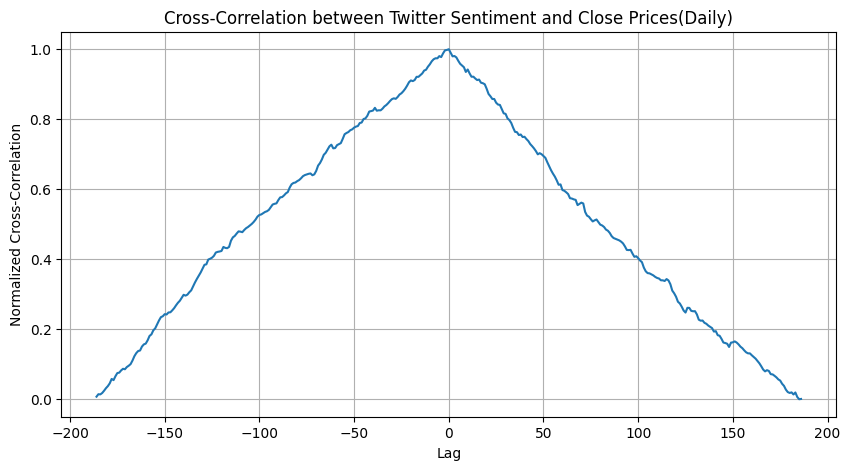

In [14]:
import numpy as np
import matplotlib.pyplot as plt

sentiment_scores = merged_data['sentiment_score'].to_numpy()
close_prices = merged_data['Close'].to_numpy()

cross_corr = np.correlate(sentiment_scores, close_prices, mode='full')
lags = np.arange(-len(sentiment_scores) + 1, len(sentiment_scores))

plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr / np.max(np.abs(cross_corr)))  # Normalize to [-1, 1]
plt.title('Cross-Correlation between Twitter Sentiment and Close Prices(Daily)')
plt.xlabel('Lag')
plt.ylabel('Normalized Cross-Correlation')
plt.grid(True)
plt.show()
